In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

I have 4 atoms and 3 bonds between them. A,B,C, and D and the bonds AB, BC, and CD.

Visually, this might look like A-B-C-D where - is the bond.

Given the coordinates of A, B, C, and D. I want to compute the torsion T(A,B,C,D) angles.

We are not computing the 2D angle, but the torsion/dihedral/rotational angle here.



In [10]:
A = np.array([0,0,0])
B = np.array([1,0,1])
C = np.array([2,0,1])
D = np.array([3,0,0])

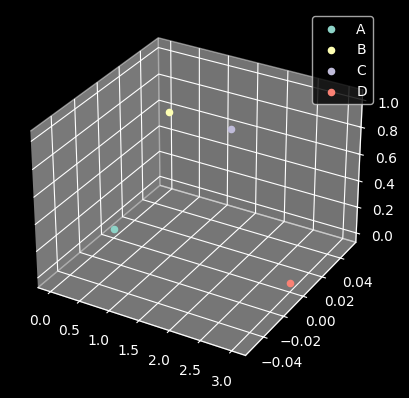

In [11]:
ax = plt.figure().add_subplot(projection='3d')
plot_point = lambda p, label: ax.scatter([p[0]], [p[1]], [p[2]], label=label)
plot_point(A, "A")
plot_point(B, "B")
plot_point(C, "C")
plot_point(D, "D")
plt.legend()

First see if I can compute planar 2D angles. For example the angle formed by ABC and BCD.


In [27]:
def dist(a,b):
	return np.linalg.norm(b-a)

def planar_angle(p1, p2, p3):
	a = dist(p1, p2)
	b = dist(p2, p3)
	c = dist(p1, p3)
	law_of_cosines = (a**2 + b**2 - c**2) / (2*a*b)
	return np.arccos(law_of_cosines)

def from360ToRads(a):
	return a*np.pi/180
def fromRadsTo360(a):
	return a*180/np.pi

print(f"{fromRadsTo360(planar_angle(A,B,C))=}")
print(f"{fromRadsTo360(planar_angle(B,C,D))=}")

fromRadsTo360(planar_angle(A,B,C))=np.float64(135.00000000000003)
fromRadsTo360(planar_angle(B,C,D))=np.float64(135.00000000000003)


Now that I know those angles, I can compute the torsion/dihedral angle that occurs by rotating the ABC plane compared to the BCD plane.

This is what https://x3dna.org/highlights/how-to-calculate-torsion-angle#:~:text=Now%20the%20torsion%20angle%20is,middle%20vector%20b%E2%86%92c. do too

In [30]:
# data from link above
abcd = np.array(
    [
        21.350,
        31.325,
        22.681,
        22.409,
        31.286,
        21.483,
        22.840,
        29.751,
        21.498,
        23.543,
        29.175,
        22.594,
    ], 
).reshape(4,3)
abcd

array([[21.35 , 31.325, 22.681],
       [22.409, 31.286, 21.483],
       [22.84 , 29.751, 21.498],
       [23.543, 29.175, 22.594]])

In [47]:
def normalize(v):
    return v / np.linalg.norm(v)

def orthogonal(a, b):
    b = normalize(b)
    orthog = a - b * a.dot(b)
    return normalize(orthog)

def torsion_angle(p1, p2, p3, p4):
    ba = p1-p2 # vector p2 to p1
    bc = p3-p2 # vector p2 to p3
    cd = p4-p3 # vector p4 to p3

    ba_orth = orthogonal(ba, bc) # plane formed by ba and orthogonal to bc
    cd_orth = orthogonal(cd, bc) # plane formed by cd and orthogonal to bc

    angle_deg = np.arccos(ba_orth.dot(cd_orth)) # since both normalized, we can leverage dot product formula to get angle
    sign = np.sign(np.cross(ba_orth, cd_orth).dot(bc)) # either negative angle or positive angle

    return sign*angle_deg

fromRadsTo360(torsion_angle(abcd[0, :], abcd[1, :], abcd[2, :], abcd[3, :]))

np.float64(-65.60922658629833)

For my original example, I should get that the torsion angle is 0

In [48]:
fromRadsTo360(torsion_angle(A, B, C, D))

np.float64(0.0)